# `AA Workshop 4` — Coding Challenge

Complete the tasks below to practice visualization techniques from `W4_Visualization.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- Core `matplotlib` plotting (scatter, line, histogram) with labels, legends, titles
- `seaborn` high-level plotting
- Styling and theming your plots
- Generating, loading, preparing, and plotting time-series data

## Task 1 - Visualizing the Iris dataset

Read in the already familiar `iris.csv` dataset (available in the `data` folder). Drop missing values. Then, generate the following plots:
1. a simple scatter plot of the "Petal.Width" and "Petal.Length" features using matplotlib. Color the data points based on "Species". Annotate your graph and size it appropriately.
2. the same scatter plot but using seaborn.
3. a histogram of "Sepal.Length". Again, color the data points based on "Species" and annotate your graph.
4. a pairplot to uncover as many relationships as possible. Again, color-code by "Species".

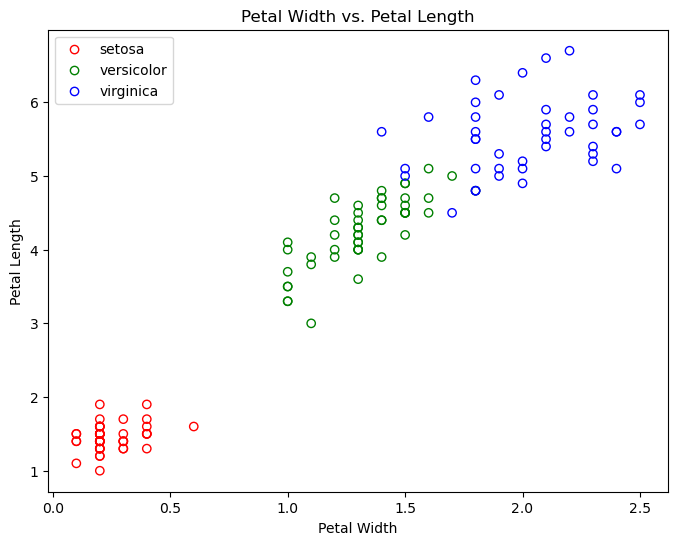

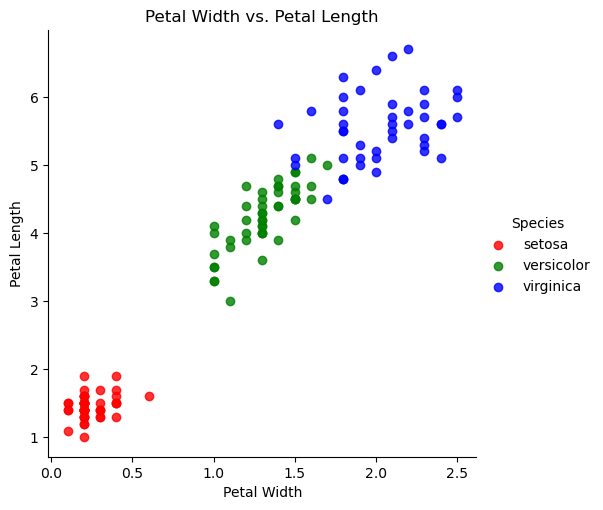

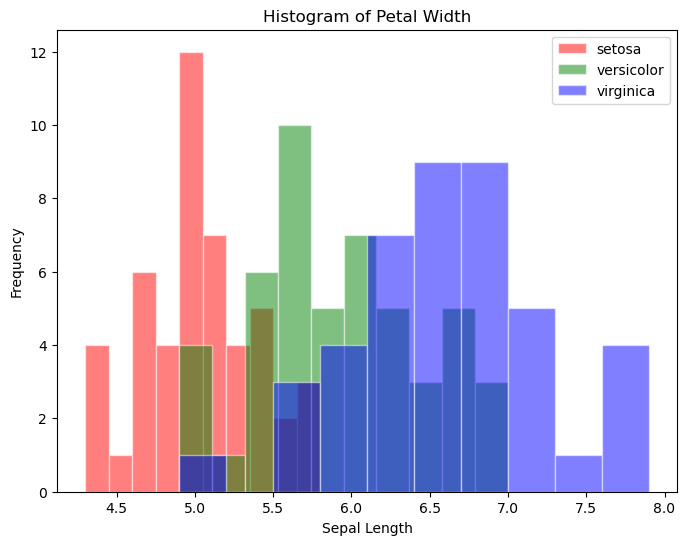

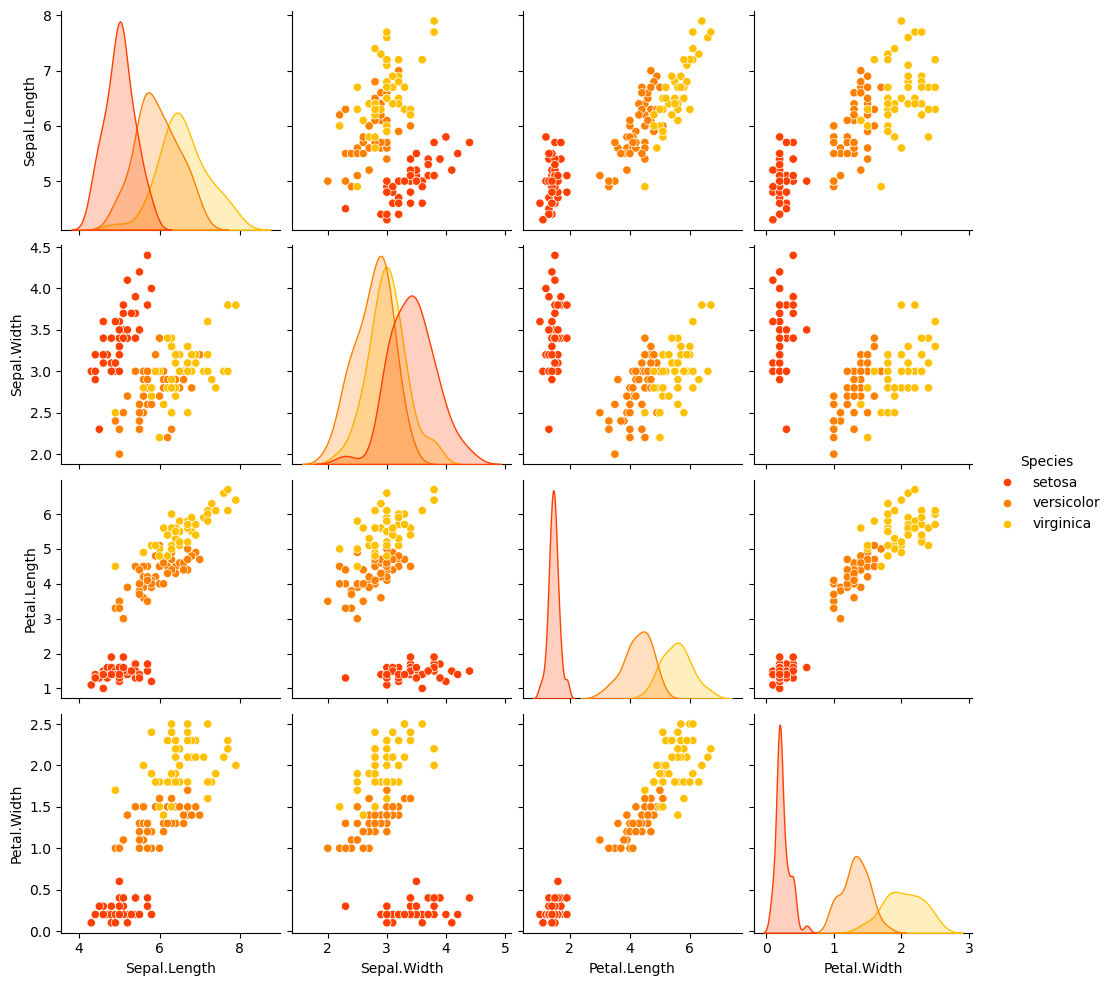

In [1]:
# your code here

## read dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv("../data/iris.csv", index_col="number")
iris = iris.dropna()

## scatter plot: matplotlib
species = iris["Species"].unique()
colors = ['r', 'g', 'b']
plt.figure(figsize = (8,6))
for i, spec in enumerate(species):
    plt.scatter(iris[iris["Species"]==spec]["Petal.Width"], iris[iris["Species"]==spec]["Petal.Length"], edgecolor=colors[i], color='none', label=spec)
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.title("Petal Width vs. Petal Length")
plt.legend()
plt.show()

## scatter plot: seaborn
sns.lmplot(x="Petal.Width", y="Petal.Length", 
                data = iris, hue="Species", palette=colors,fit_reg=False)
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.title("Petal Width vs. Petal Length")
plt.show()

## histogram
plt.figure(figsize = (8,6))
for i, spec in enumerate(species):
    plt.hist(iris[iris["Species"]==spec]["Sepal.Length"], color=colors[i], edgecolor="white", alpha = 0.5, label=spec)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Width")
plt.legend()
plt.show()

## pairplot
sns.pairplot(iris, hue = "Species", palette = 'autumn')
plt.show()

## Task 2 - Comparing Trends on Google

Go to https://trends.google.de/trends/explore. Think about two or more search terms that you would like to compare over time. You can also adjust the considered time horizon (e.g., 1 year, 5 years etc.) and geography (e.g., Germany, worldwide etc.). 

1. Export your generated data by hitting the download icon in the top-right corner of the line plot.
2. Load your data into a dataframe and inspect it.
3. Re-create the line plot from Google trends using matplotlib or seaborn. You might have to transform your dataframe first.
4. Optimize the appearance of your plot by using an aquarel theme.

In [2]:
# your code here

## load data
trends_data = pd.read_csv("../data/Google_Trends_Programming_Languages.csv", header=1)

## adjust column names
trends_data.columns = ["week", "python", "java", "javascript"]

trends_data.head()

,week,python,java,javascript
0,2020-11-01,56,40,29
1,2020-11-08,67,46,33
2,2020-11-15,68,48,33
3,2020-11-22,62,45,29
4,2020-11-29,64,47,31


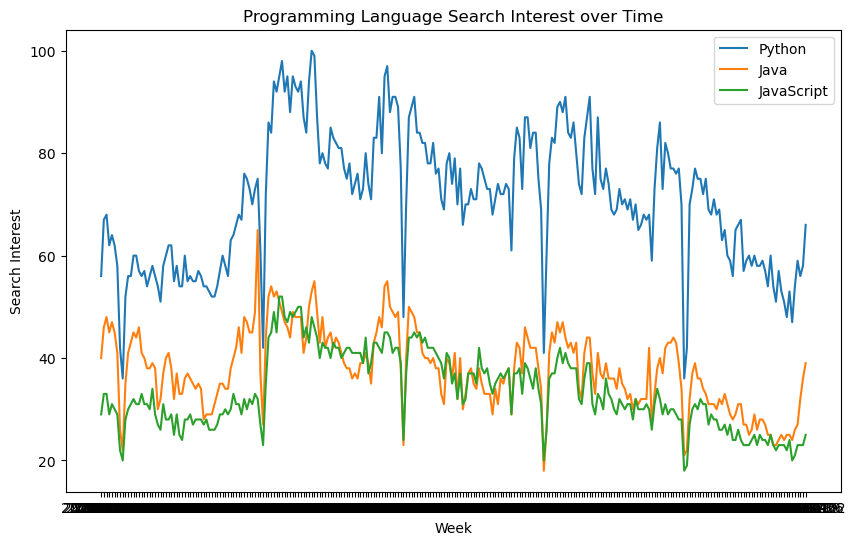

In [3]:
# create line plot
plt.figure(figsize = (10,6))
plt.plot(trends_data["week"], trends_data["python"], label="Python")
plt.plot(trends_data["week"], trends_data["java"], label="Java")
plt.plot(trends_data["week"], trends_data["javascript"], label="JavaScript")
plt.xlabel("Week")
plt.ylabel("Search Interest")
plt.title("Programming Language Search Interest over Time")
plt.legend()
plt.show()

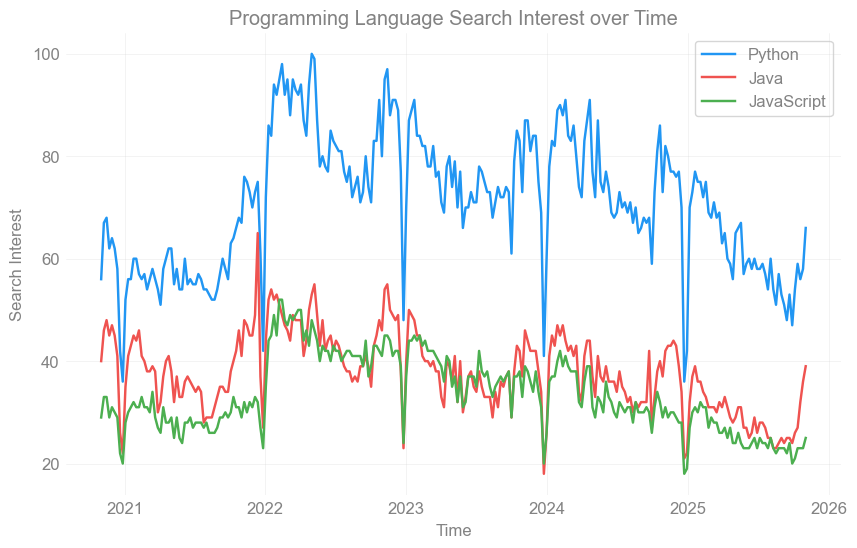

In [4]:
# optimize appearance

## change x-axis to date
trends_data["week"] = pd.to_datetime(trends_data["week"])

## create line plot using aquarel theme
from aquarel import load_theme

with load_theme("ambivalent"):
    plt.figure(figsize = (10,6))
    plt.plot(trends_data["week"], trends_data["python"], label="Python")
    plt.plot(trends_data["week"], trends_data["java"], label="Java")
    plt.plot(trends_data["week"], trends_data["javascript"], label="JavaScript")
    plt.xlabel("Time")
    plt.ylabel("Search Interest")
    plt.title("Programming Language Search Interest over Time")
    plt.legend()
    plt.show()